In [26]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.svm import SVC  # Import SVM classifier
from sklearn.neighbors import KNeighborsClassifier #import KNN classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier #import Random Forest classifier
from sklearn.naive_bayes import GaussianNB #import Naive bayes classifier
import seaborn as sns
from sklearn.metrics import confusion_matrix,classification_report # for confusion matrix and accuracy measures
import numpy as np # linear algebra
import pandas as pd
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
data = pd.read_csv("C:/Users/USER/Desktop/sem5/da/project/Accidents_categorical.csv")
data.shape

(251832, 33)

In [12]:
def preprop(data, to_drop=[], na_thresh = 0.25):
    log = []
    for i in to_drop:                           # Explicitly drop specified columns (intuition and logical reasoning) 
        data = data.drop(i, axis=1)
        log.append("Dropped column " + i + " as requested")

    report = getStats(data)
    # print(report)
    replace_index = {}
    for i in report:
        # print(i)
        if i == "uncertain":            # report has a class of uncertain columns; Do nothing to them
            continue
        
        # If numerical column and less than threshold percentage is empty, fill it with mean of column
        if report[i]["type"] == 'num' and report[i]["na"] > 0 and report[i]["na"] < na_thresh :
            data[i] = data[i].fillna(data[i].mean())
            log.append(i + " : replaced Nan/Na with mean")
            
        #If in any column, more than threshold percentage is empty, drop such columns
        elif (report[i]["type"] == 'num' or report[i]["type"] == 'cat') and report[i]["na"] >= na_thresh :
            # print(data.columns)
            data = data.drop(i, axis=1)
            log.append("Dropped column " + i + " as Nan/Na ratio (" + str(report[i]["na"]) + ") > " + str(na_thresh))
            
            
        # If column is categorical, encode them with numerical classes    
        if report[i]["type"] == 'cat' and i in data.columns:
            replace_index[i] = getEncodings(data[i])
            log.append("Encoded column " + i)

    data = data.replace(replace_index)


    return data, log, replace_index # Returning cleaned data, log of changes made and categorical encodings dict (if any)



def getEncodings(o):
    o = list(set(o))
    o = sorted(o)
    enc = {cls: ind for ind, cls in enumerate(o)}
    return enc


def getStats(data):
    cols = data.columns
    report = {}
    report['uncertain'] = []
    for i in cols:
        report[i] = {}
        report[i]["na"] = data[i].isna().sum() / len(data)
        if "unique" in str(data[i].describe()):
            if len(data[i].unique()) <  0.25 * len(data):
                report[i]["type"] = "cat"
                report[i]["uniq"] = data[i].unique()
                report[i]["uniq_no"] = len(data[i].unique())
            else:
                report["uncertain"].append(i)
        else:
            report[i]["type"] = "num"
    return report


# Accident_Index and Datetime provide no useful information
prepro_data, logs, encs = preprop(data, to_drop=["Accident_Index", "Datetime"])  
#print("\n".join(logs))

In [13]:
cols = list(prepro_data.columns)
feature_cols=[]
for i in range(0,len(cols)-1):
    feature_cols.append(cols[i])
#print(feature_cols)
X = prepro_data[feature_cols] # Features
y = prepro_data.Accident_Severity # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

Accuracy: 0.669185969556585
              precision    recall  f1-score   support

           0       0.37      0.35      0.36     20233
           1       0.77      0.79      0.78     55317

    accuracy                           0.67     75550
   macro avg       0.57      0.57      0.57     75550
weighted avg       0.66      0.67      0.67     75550



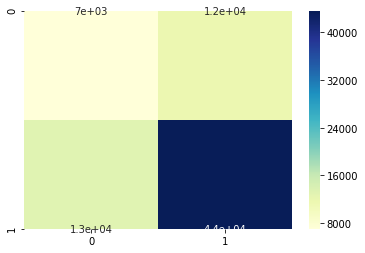

In [14]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))

In [13]:
# training a linear SVM classifier
from sklearn.svm import SVC
svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
svm_predictions = svm_model_linear.predict(X_test) 
print("Accuracy:",metrics.accuracy_score(y_test, svm_predictions))

cm = confusion_matrix(y_test, svm_predictions) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))

Accuracy: 0.7453474520185308


Accuracy: 0.7279814692256784
              precision    recall  f1-score   support

           0       0.13      0.58      0.21      4085
           1       0.97      0.77      0.86     71465

    accuracy                           0.76     75550
   macro avg       0.55      0.68      0.53     75550
weighted avg       0.92      0.76      0.82     75550

              precision    recall  f1-score   support

           0       0.13      0.58      0.21      4085
           1       0.97      0.77      0.86     71465

    accuracy                           0.76     75550
   macro avg       0.55      0.68      0.53     75550
weighted avg       0.92      0.76      0.82     75550



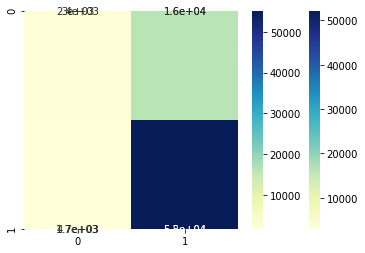

In [28]:
# training a KNN classifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print("Accuracy:",accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm = confusion_matrix(y_test, knn_predictions) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))

Accuracy: 0.7676240900066181
              precision    recall  f1-score   support

           0       0.15      0.65      0.24      4284
           1       0.97      0.77      0.86     71266

    accuracy                           0.77     75550
   macro avg       0.56      0.71      0.55     75550
weighted avg       0.93      0.77      0.83     75550



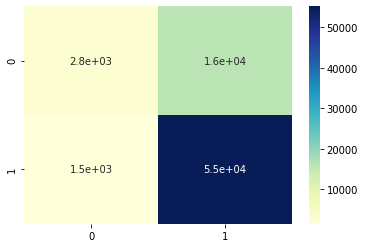

In [13]:
#training Random Forest model

clf=RandomForestClassifier(n_estimators=500)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))

Accuracy: 0.7341892786234282
              precision    recall  f1-score   support

           0       0.23      0.44      0.30      9742
           1       0.90      0.78      0.84     65808

    accuracy                           0.73     75550
   macro avg       0.56      0.61      0.57     75550
weighted avg       0.82      0.73      0.77     75550



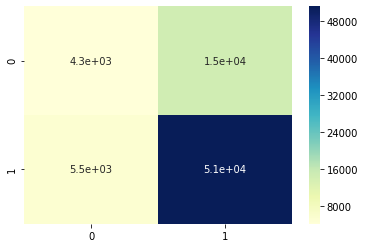

In [16]:
#training Naive Bayes model

model = GaussianNB()
model.fit(X_train, y_train)
y_pred=model.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred) 
sns.heatmap(cm,annot=True,cmap="YlGnBu")
print(classification_report(y_pred, y_test))